In [115]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = datasets.load_iris(return_X_y=True)

In [6]:
X = X[:,:2]

In [9]:
np.unique(y)

array([0, 1, 2])

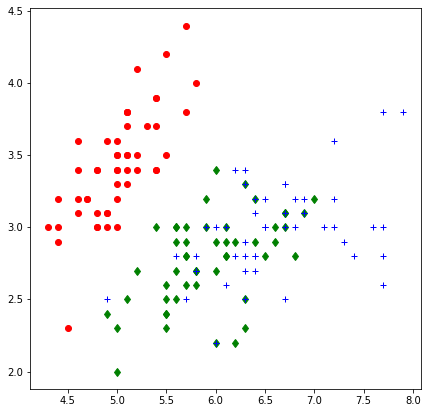

In [36]:
def plot(X, y):
    classes = np.unique(y)
    colors = ['ro', 'gd', 'b+']
    for c, color in zip(classes, colors):
        index = y == c
        x_c = X[index,:]
        plt.plot(x_c[:,0], x_c[:,1], color)
plt.figure(figsize=(7,7))
plot(X, y)
plt.show()

In [15]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
clf.coef_

array([[-2.70890249,  2.32402378],
       [ 0.61273259, -1.57058803],
       [ 2.0961699 , -0.75343574]])

In [17]:
clf.intercept_

array([ 7.91322129,  1.84504714, -9.75826843])

In [18]:
w0, b0 = [-2.70890249,  2.32402378], 7.91322129
w1, b1 = [ 0.61273259, -1.57058803], 1.84504714
w2, b2 = [ 2.0961699 , -0.75343574], -9.75826843

In [40]:
meshX, meshY = np.meshgrid(np.linspace(4.0, 8.0, 401), np.linspace(2.0, 4.5, 251))

In [41]:
meshXY = np.concatenate([meshX.reshape(-1,1), meshY.reshape(-1,1)], axis=1)

In [42]:
meshXY.shape

(100651, 2)

In [43]:
meshPRED = clf.predict(meshXY)

In [44]:
meshPRED = meshPRED.reshape(meshX.shape)

In [45]:
meshX.shape, meshY.shape, meshPRED.shape

((251, 401), (251, 401), (251, 401))

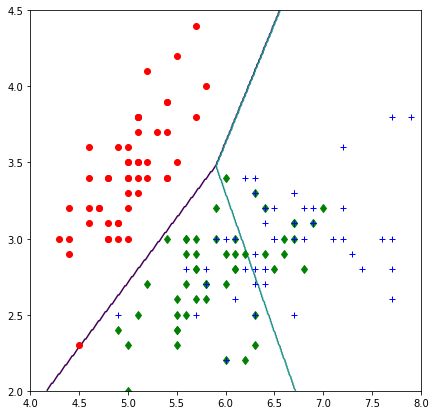

In [46]:
plt.figure(figsize=(7,7))
plt.contour(meshX, meshY, meshPRED, levels=[0,1,2])
plot(X, y)
plt.show()

In [102]:
svm = SVC(C=1000, kernel='rbf', degree=3)
svm.fit(X, y)
svmPRED = svm.predict(meshXY)
svmPRED = svmPRED.reshape(meshX.shape)

In [103]:
svm.support_vectors_.shape

(71, 2)

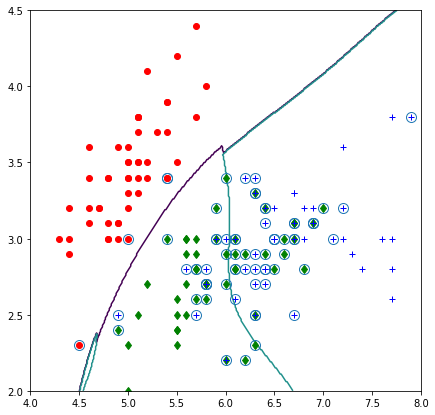

In [104]:
plt.figure(figsize=(7,7))
plt.contour(meshX, meshY, svmPRED, levels=[0,1,2])
svx, svy = svm.support_vectors_[:,0], svm.support_vectors_[:,1]
plot(X, y)
plt.plot(svx, svy, 'o', markersize=10, fillstyle='none')
plt.show()

In [93]:
svm = SVC()
clf = GridSearchCV(svm, param_grid={ 'C':[0.1, 1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4]})

In [82]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
clf.cv_results_

{'mean_fit_time': array([2.19807625e-03, 1.79896355e-03, 3.79667282e-03, 1.99890137e-03,
        2.19826698e-03, 3.23792934e-02, 1.59864426e-03, 1.05926037e-02,
        1.36752272e-01, 4.19688225e-03, 1.13725853e-01, 1.34434800e+00,
        5.23674011e-02, 7.49270773e-01, 1.11023815e+01]),
 'std_fit_time': array([4.00260036e-04, 4.00710712e-04, 7.47017262e-04, 1.09445172e-03,
        3.99447327e-04, 2.04778494e-02, 4.89824467e-04, 3.71910528e-03,
        9.10305242e-02, 7.47754969e-04, 6.51398192e-02, 5.19940793e-01,
        4.58827024e-02, 2.74158643e-01, 3.97275335e+00]),
 'mean_score_time': array([0.00099955, 0.0011992 , 0.00139956, 0.00079899, 0.00079966,
        0.00039968, 0.00079966, 0.00080056, 0.00039935, 0.00079975,
        0.00140061, 0.00059967, 0.00059981, 0.00079913, 0.00119929]),
 'std_score_time': array([1.37044028e-06, 3.98780469e-04, 7.98440312e-04, 3.99494313e-04,
        3.99829023e-04, 4.89512039e-04, 3.99828426e-04, 4.00281077e-04,
        4.89103521e-04, 7.479079

In [86]:
index = clf.cv_results_['mean_test_score'].argmax()
index

10

In [87]:
clf.cv_results_['params'][index], clf.cv_results_['mean_test_score'][index]

({'C': 100, 'degree': 3, 'kernel': 'poly'}, 0.82)

In [105]:
X, y = datasets.load_digits(return_X_y=True)

In [106]:
X.shape, y.shape

((1797, 64), (1797,))

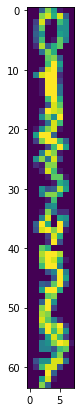

In [110]:
def imshow(X, y):
    plt.imshow(X.reshape((-1, 8)))
    plt.show()
plt.figure(figsize=(7,7))
imshow(X[:8], y[:8])

In [116]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2)
svm = SVC()
svm.fit(xtr, ytr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
svm.support_vectors_.shape

(645, 64)

In [118]:
ypred = svm.predict(xte)
cm = confusion_matrix(yte, ypred)
print(cm)

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  1]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  0  1 31]]


In [119]:
accuracy_score(yte, ypred)

0.9888888888888889

In [120]:
len(yte)

360

In [121]:
index = yte != ypred

In [122]:
wrongX, wrongY, predY = xte[index], yte[index], ypred[index]

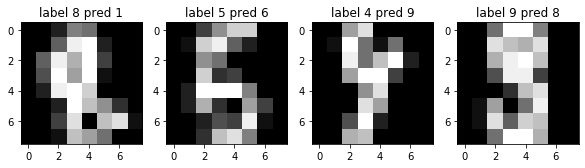

In [129]:
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(1,4,i+1)
    plt.imshow(wrongX[i].reshape(8,8), cmap='gray')
    plt.title(f'label {wrongY[i]} pred {predY[i]}')